## 1 - Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## 2 - Eğitim Veri Setine Bakış

In [ ]:
train_final = pd.read_parquet('/kaggle/input/turkiye-is-bankasi-ml-challenge-5/train_final.parquet')
df = train_final.copy()
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


In [ ]:
# month sütunundaki değişkenlerin dönüşümü

aylar = {10: 'Ekim', 11: 'Kasım', 12: 'Aralık'}
df['month'] = df['month'].map(aylar)

df["month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 94049 entries, 0 to 94048
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
94049 non-null  object
dtypes: object(1)
memory usage: 734.9+ KB


In [ ]:
# unique id'ye sahip olanlar
df["id"].nunique()

- Geri kalan 14000 satırın duplicate olup olmadığını kontrol etmeliyiz.

In [ ]:
tekrar_edilen_satirlar = df[df.duplicated()]
print(tekrar_edilen_satirlar.shape)

- Görüldüğü gibi geri kalan değerlerin aslında duplicate olmadığını anlamış olduk.

## 4 - Eğitim Veri Seti Eksik Gözlem Analizi

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

- ***Herhangi bir eksik değerimiz yok.***

## 5 - Eğitim Seti Aykırı Gözlem Analizi

In [ ]:
df_say = df.select_dtypes(include = ["float64","int64"])

In [ ]:
# Aykırı gözlemleri baskılamak için fonksiyon tanımladık.
def aykiri_gozlem_baskila(degisken):

    Q1 = degisken.quantile(0.25)
    Q3 = degisken.quantile(0.75)

    IQR = Q3-Q1

    low_limit = Q1 - 1.5*IQR
    up_limit = Q3 + 1.5*IQR

    degisken_low_limit = (degisken < low_limit)
    degisken_up_limit = (degisken > up_limit)

    degisken[degisken_up_limit] = up_limit
    degisken[degisken_low_limit] = low_limit

In [ ]:
# Aykırı gözlemleri baskıladık.

for i in df_say.columns:
    aykiri_gozlem_baskila(df[i])

In [ ]:
df.head()

In [ ]:
df.describe().T

In [ ]:
# Tüm sayısal değişkenler için aykırı gözlemlerin ortadan kaldırıldığını boxplot yardımıyla gözlemliyoruz.

for column in df_say.columns:
  plt.title(column)
  sns.boxplot(df[column])
  plt.show(block = True)

## 6 - Eğitim Veri Seti Değişken Dönüşümleri

In [ ]:
df.head()

In [ ]:
haric_tut = [1,2,3,4,5,6,15,16,18,27,28,41,51,55,56,57]
df.columns[haric_tut]

a = df.columns[haric_tut]
for i in df.columns:
    if i in a:
        continue
    else:
        df.drop(i, axis=1, inplace=True)
df

,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_8,feature_9,feature_11,feature_20,feature_21,feature_34,feature_44,feature_48,feature_49,target
0,Ekim,1070.350,465.931,205.948,VODAFONE TR,Apple,2.351266,-4.607631,-0.555387,1.087103,2.101993,1.720066,-1.023478,30.0,58.0,"menu2, menu4, menu5"
1,Ekim,1070.350,465.931,216.961,TURKCELL,samsung,1.451937,-3.183905,1.165963,0.259852,0.961554,1.048365,-0.195770,21.0,45.0,"menu7, menu8, menu4"
2,Ekim,1070.350,465.931,43.806,TURK TELEKOM,Redmi,2.017303,-4.631071,-0.837522,0.450119,2.716429,2.058538,0.631790,19.0,61.0,"menu2, menu8, menu4"
3,Ekim,1070.350,154.509,64.724,TURKCELL,samsung,2.065699,-5.803766,0.151038,-0.227111,1.817213,2.043422,0.213170,2.0,41.0,"menu6, menu2, menu1"
4,Ekim,1070.350,465.931,216.961,VODAFONE TR,samsung,2.089750,-2.974129,-1.459318,2.345008,0.402893,0.391379,-0.186423,23.0,85.0,"menu6, menu2, menu8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,Aralık,44.397,43.425,41.678,O2 - DE,HUAWEI,0.281010,-2.138380,-0.869615,3.012400,-0.864161,-1.029142,0.863442,29.0,68.0,"menu2, menu8, menu4"
94045,Aralık,44.331,43.977,40.620,TURKCELL,samsung,0.948406,-4.730049,2.198612,1.441808,2.736235,0.352488,-0.340132,25.0,43.0,"menu9, menu2, menu5"
94046,Aralık,44.142,43.591,41.736,VODAFONE TR,Apple,2.083203,-3.856639,0.589634,1.341426,1.373827,0.478749,0.445361,4.0,25.0,"menu6, menu2, menu4"
94047,Aralık,43.963,43.350,40.862,TURK TELEKOM,Redmi,0.674416,-3.518045,-1.411648,1.809454,-0.541377,-1.073745,1.284815,25.0,60.0,"menu6, menu8, menu4"


In [ ]:
# One-Hot Encoding

df_c = df.copy()
surekli_degiskenler = df_c[["n_seconds_1","n_seconds_2","n_seconds_3","feature_8","feature_9","feature_11","feature_20","feature_21","feature_34",
                           "feature_44","feature_48","feature_49"]].copy()
df_target = df_c.drop(["n_seconds_1","n_seconds_2","n_seconds_3","feature_8","feature_9","feature_11","feature_20","feature_21","feature_34",
                           "feature_44","feature_48","feature_49"], axis = 1)

df_target.head()

,month,carrier,devicebrand,target
0,Ekim,VODAFONE TR,Apple,"menu2, menu4, menu5"
1,Ekim,TURKCELL,samsung,"menu7, menu8, menu4"
2,Ekim,TURK TELEKOM,Redmi,"menu2, menu8, menu4"
3,Ekim,TURKCELL,samsung,"menu6, menu2, menu1"
4,Ekim,VODAFONE TR,samsung,"menu6, menu2, menu8"


In [ ]:
df_target['temiz_target'] = df_target['target'].apply(lambda x: ','.join([value.strip() for value in x.split(',')]))
df_target

,month,carrier,devicebrand,target,temiz_target
0,Ekim,VODAFONE TR,Apple,"menu2, menu4, menu5","menu2,menu4,menu5"
1,Ekim,TURKCELL,samsung,"menu7, menu8, menu4","menu7,menu8,menu4"
2,Ekim,TURK TELEKOM,Redmi,"menu2, menu8, menu4","menu2,menu8,menu4"
3,Ekim,TURKCELL,samsung,"menu6, menu2, menu1","menu6,menu2,menu1"
4,Ekim,VODAFONE TR,samsung,"menu6, menu2, menu8","menu6,menu2,menu8"
...,...,...,...,...,...
94044,Aralık,O2 - DE,HUAWEI,"menu2, menu8, menu4","menu2,menu8,menu4"
94045,Aralık,TURKCELL,samsung,"menu9, menu2, menu5","menu9,menu2,menu5"
94046,Aralık,VODAFONE TR,Apple,"menu6, menu2, menu4","menu6,menu2,menu4"
94047,Aralık,TURK TELEKOM,Redmi,"menu6, menu8, menu4","menu6,menu8,menu4"


In [ ]:
df_encoded = df_target['temiz_target'].str.join('|').str.get_dummies().add_prefix('menu').iloc[:, 1:-4]
df_encoded.head()

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
0,0,1,0,1,1,0,0,0,0
1,0,0,0,1,0,0,1,1,0
2,0,1,0,1,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,0


In [ ]:
df = pd.concat([df_target.copy(), df_encoded], axis=1)
df = df.drop(["target","temiz_target"], axis = 1)
df.head()

,month,carrier,devicebrand,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
0,Ekim,VODAFONE TR,Apple,0,1,0,1,1,0,0,0,0
1,Ekim,TURKCELL,samsung,0,0,0,1,0,0,1,1,0
2,Ekim,TURK TELEKOM,Redmi,0,1,0,1,0,0,0,1,0
3,Ekim,TURKCELL,samsung,1,1,0,0,0,1,0,0,0
4,Ekim,VODAFONE TR,samsung,0,1,0,0,0,1,0,1,0


In [ ]:
df_ay = pd.get_dummies(df['month'], drop_first=True).astype(int)
df = pd.concat([df, df_ay], axis=1)
df = df.drop(['month'], axis=1)
df.head()

,carrier,devicebrand,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9,Ekim,Kasım
0,VODAFONE TR,Apple,0,1,0,1,1,0,0,0,0,1,0
1,TURKCELL,samsung,0,0,0,1,0,0,1,1,0,1,0
2,TURK TELEKOM,Redmi,0,1,0,1,0,0,0,1,0,1,0
3,TURKCELL,samsung,1,1,0,0,0,1,0,0,0,1,0
4,VODAFONE TR,samsung,0,1,0,0,0,1,0,1,0,1,0


In [ ]:
df_cihaz = pd.get_dummies(df['devicebrand'], drop_first = True).add_prefix('device_').astype(int)
df = pd.concat([df, df_cihaz], axis = 1)
df = df.drop(["devicebrand"], axis = 1)
df.head()

,carrier,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9,...,device_iBRIT,device_lge,device_meizu,device_motorola,device_nubia,device_realme,device_reeder,device_samsung,device_vivo,device_xiaomi
0,VODAFONE TR,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TURKCELL,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,TURK TELEKOM,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TURKCELL,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,VODAFONE TR,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_hat = pd.get_dummies(df['carrier'], drop_first = True).add_prefix('carrier_').astype(int)
df = pd.concat([df, df_hat], axis = 1)
df = df.drop(['carrier'], axis = 1)
df.head()

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9,Ekim,...,carrier_ZAIN JO,carrier_ZAIN KSA,carrier_ZAIN KW,carrier_ZAIN SDN,carrier_ZAIN WTTC KSA,carrier_ZULKIF ORAK,carrier_عيش الحماس,carrier_ドコモ,carrier_中国移动,carrier_中国联通
0,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, surekli_degiskenler],axis = 1)
df

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9,Ekim,...,n_seconds_3,feature_8,feature_9,feature_11,feature_20,feature_21,feature_34,feature_44,feature_48,feature_49
0,0,1,0,1,1,0,0,0,0,1,...,205.948,2.351266,-4.607631,-0.555387,1.087103,2.101993,1.720066,-1.023478,30.0,58.0
1,0,0,0,1,0,0,1,1,0,1,...,216.961,1.451937,-3.183905,1.165963,0.259852,0.961554,1.048365,-0.195770,21.0,45.0
2,0,1,0,1,0,0,0,1,0,1,...,43.806,2.017303,-4.631071,-0.837522,0.450119,2.716429,2.058538,0.631790,19.0,61.0
3,1,1,0,0,0,1,0,0,0,1,...,64.724,2.065699,-5.803766,0.151038,-0.227111,1.817213,2.043422,0.213170,2.0,41.0
4,0,1,0,0,0,1,0,1,0,1,...,216.961,2.089750,-2.974129,-1.459318,2.345008,0.402893,0.391379,-0.186423,23.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,0,1,0,1,0,0,0,1,0,0,...,41.678,0.281010,-2.138380,-0.869615,3.012400,-0.864161,-1.029142,0.863442,29.0,68.0
94045,0,1,0,0,1,0,0,0,1,0,...,40.620,0.948406,-4.730049,2.198612,1.441808,2.736235,0.352488,-0.340132,25.0,43.0
94046,0,1,0,1,0,1,0,0,0,0,...,41.736,2.083203,-3.856639,0.589634,1.341426,1.373827,0.478749,0.445361,4.0,25.0
94047,0,0,0,1,0,1,0,1,0,0,...,40.862,0.674416,-3.518045,-1.411648,1.809454,-0.541377,-1.073745,1.284815,25.0,60.0


**RobustScaler**

- Aykırı değerlere dayanıklı olmasından dolayı bunu tercih ettik.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9,Ekim,...,n_seconds_3,feature_8,feature_9,feature_11,feature_20,feature_21,feature_34,feature_44,feature_48,feature_49
0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,1.0,...,1.999403,1.496144,-0.747282,0.071121,-0.487886,0.679435,1.380241,-1.244115,0.818182,0.421053
1,0.0,-1.0,0.0,1.0,0.0,-1.0,1.0,1.0,0.0,1.0,...,2.168091,0.640818,0.439094,1.230411,-1.245176,-0.094608,0.815918,-0.457210,0.000000,-0.263158
2,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,1.0,...,-0.484162,1.178522,-0.766815,-0.118891,-1.071000,1.096467,1.664604,0.329554,-0.181818,0.578947
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.163756,1.224549,-1.744009,0.546882,-1.690956,0.486148,1.651905,-0.068430,-1.727273,-0.473684
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.168091,1.247423,0.613899,-0.537657,0.663638,-0.473785,0.263956,-0.448324,0.181818,1.842105


**StandartScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

df_scaled.head()

,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9,Ekim,...,n_seconds_3,feature_8,feature_9,feature_11,feature_20,feature_21,feature_34,feature_44,feature_48,feature_49
0,-0.558368,0.510400,-0.25279,1.19282,1.993761,-1.495749,-0.214368,-0.671960,-0.575938,2.28378,...,2.116490,1.880535,-0.958027,0.034573,-0.580814,0.898423,1.807057,-1.632605,1.147400,0.553716
1,-0.558368,-1.959249,-0.25279,1.19282,-0.501565,-1.495749,4.664883,1.488184,-0.575938,2.28378,...,2.325714,0.772248,0.659770,1.568408,-1.595778,-0.173211,1.053033,-0.581739,0.058426,-0.451444
2,-0.558368,0.510400,-0.25279,1.19282,-0.501565,-1.495749,-0.214368,1.488184,-0.575938,2.28378,...,-0.963873,1.468977,-0.984663,-0.216827,-1.362337,1.475788,2.187012,0.468940,-0.183568,0.785676
3,1.790934,0.510400,-0.25279,-0.83835,-0.501565,0.668561,-0.214368,-0.671960,-0.575938,2.28378,...,-0.566474,1.528617,-2.317209,0.664044,-2.193238,0.630824,2.170044,-0.062545,-2.240518,-0.760724
4,-0.558368,0.510400,-0.25279,-0.83835,-0.501565,0.668561,-0.214368,1.488184,-0.575938,2.28378,...,2.325714,1.558256,0.898141,-0.770888,0.962525,-0.698167,0.315526,-0.569872,0.300420,2.641356


## 7 - Test Verisine Bakış

In [ ]:
test_final = pd.read_parquet('/kaggle/input/turkiye-is-bankasi-ml-challenge-5/test_final.parquet')
df_test = test_final.copy()

# 'id' sütununu saklama
test_ids = df_test['id']

df_test.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,VODAFONE TR,samsung,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,TURKCELL,Apple,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,TURKCELL,samsung,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,TURK TELEKOM,Apple,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,TURKCELL,POCO,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52


In [ ]:
# month sütunundaki değişkenlerin dönüşümü

aylar = {1: 'Ocak'}
df_test['month'] = df_test['month'].map(aylar)

df_test["month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11955 entries, 0 to 11954
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
11955 non-null  object
dtypes: object(1)
memory usage: 93.5+ KB


In [ ]:
# unique id'ye sahip olanlar
df_test["id"].nunique()

- Hepsi Unique

## 8 - Test Veri Seti Eksik Gözlem Analizi

In [ ]:
df_test.isnull().sum()

- ***Eksik gözlem yoktur.***

## 9 - Test Seti Aykırı Gözlem Analizi

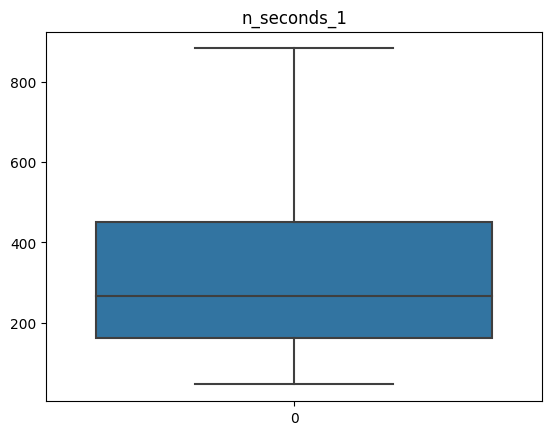

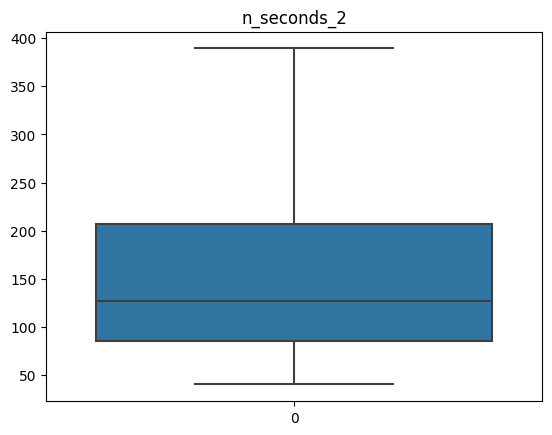

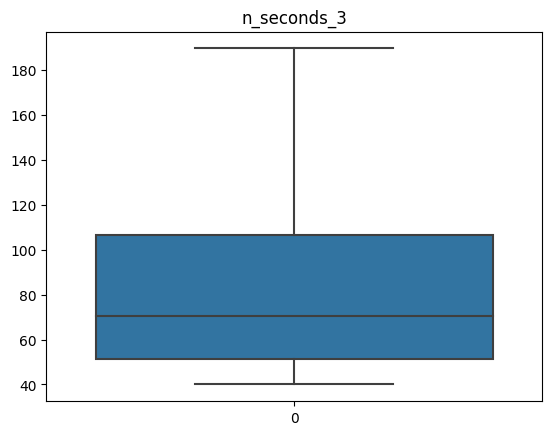

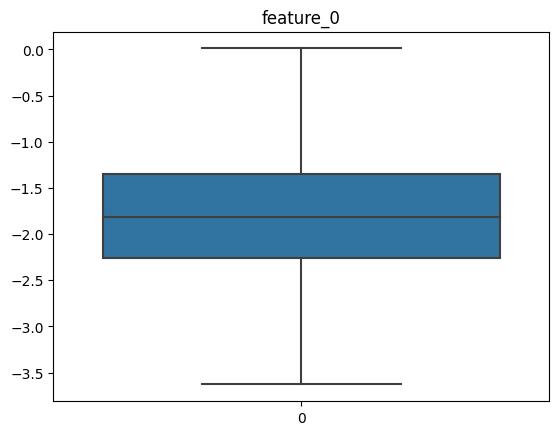

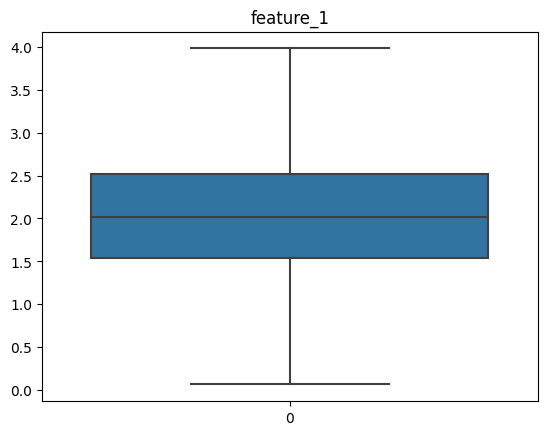

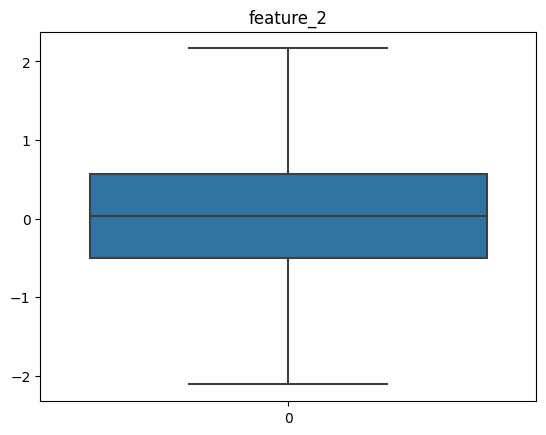

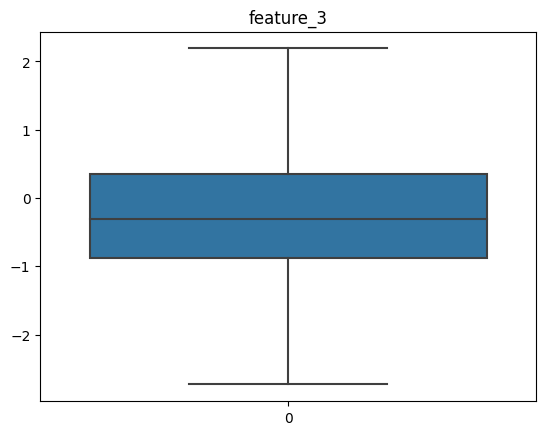

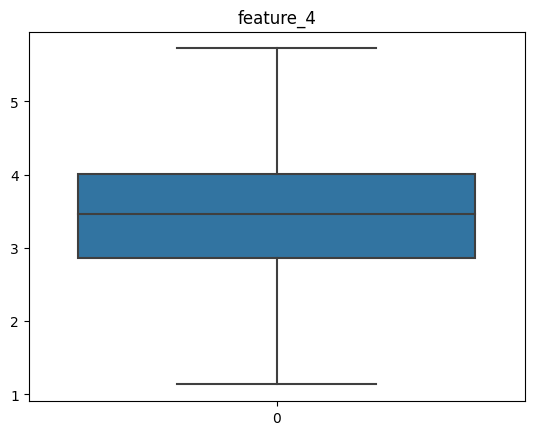

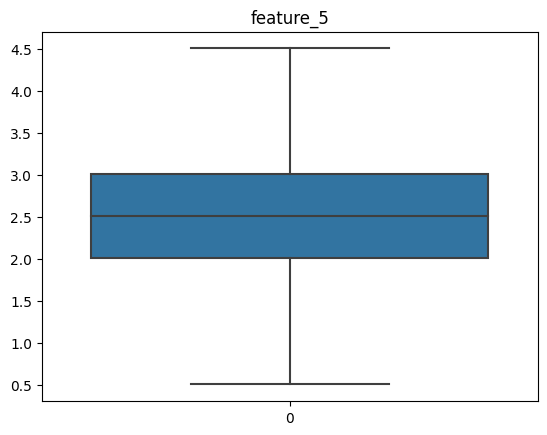

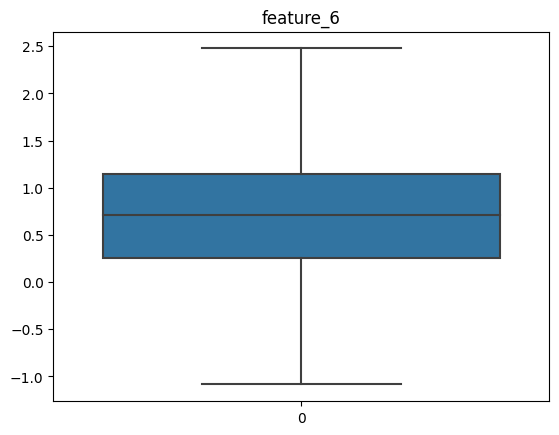

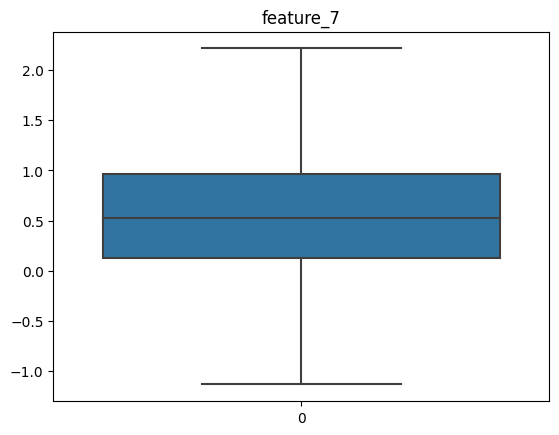

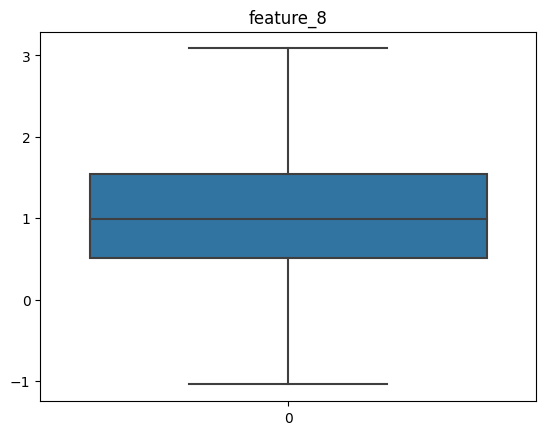

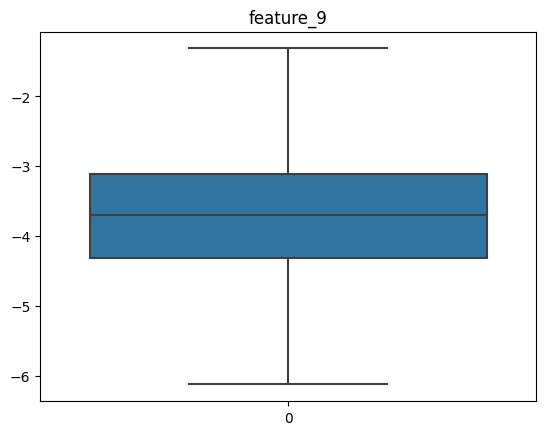

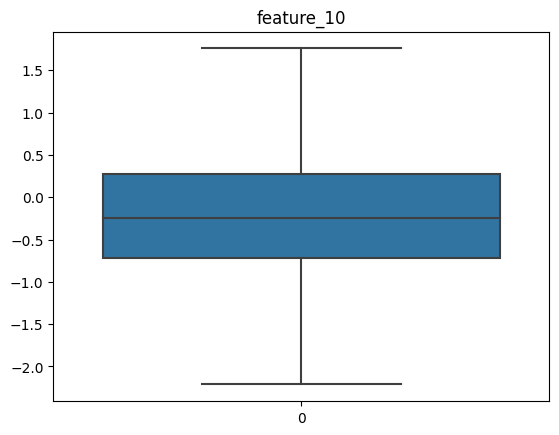

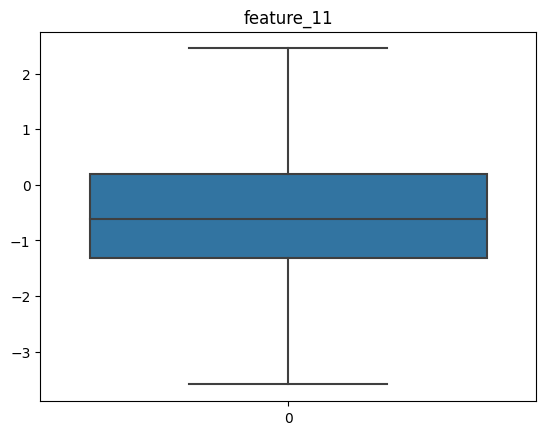

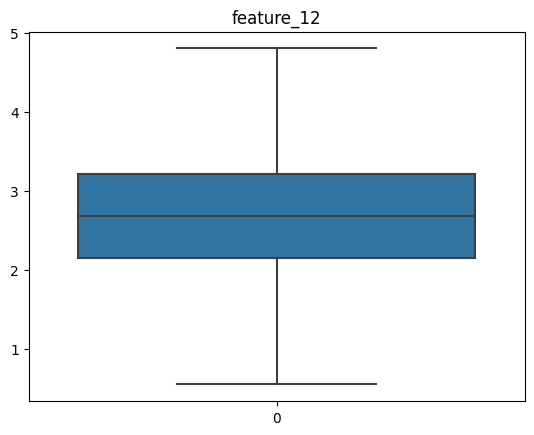

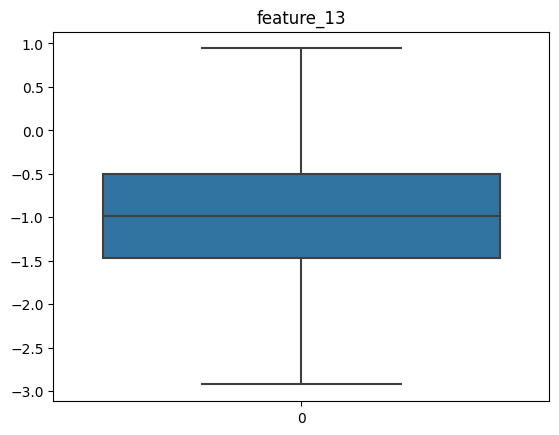

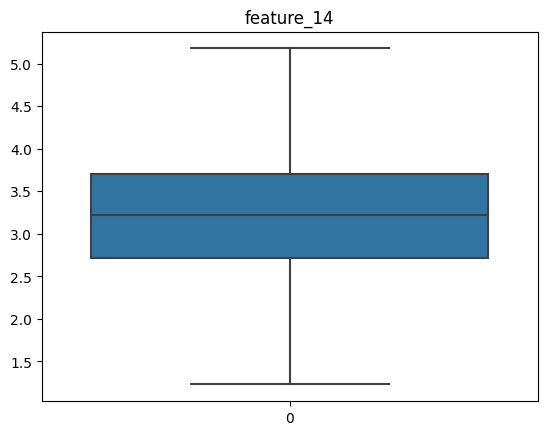

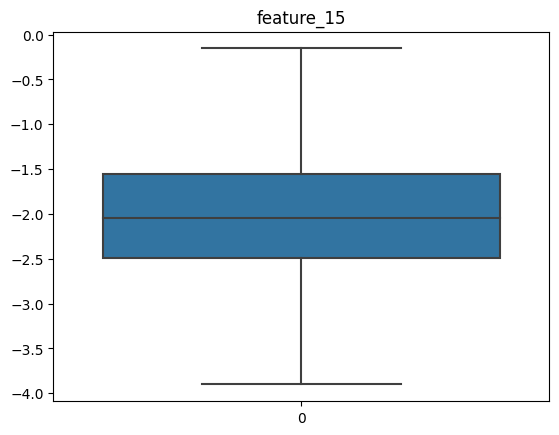

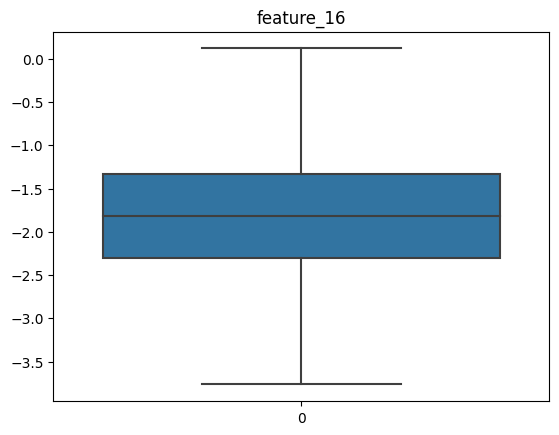

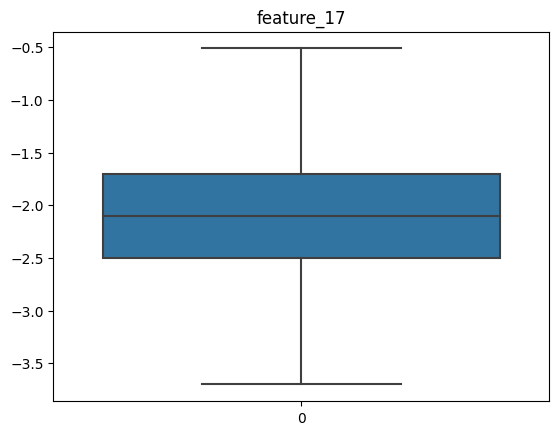

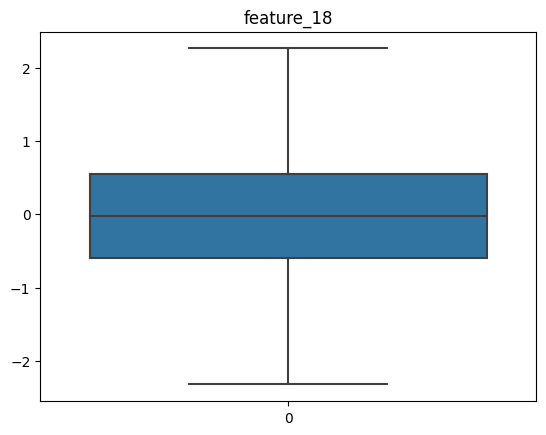

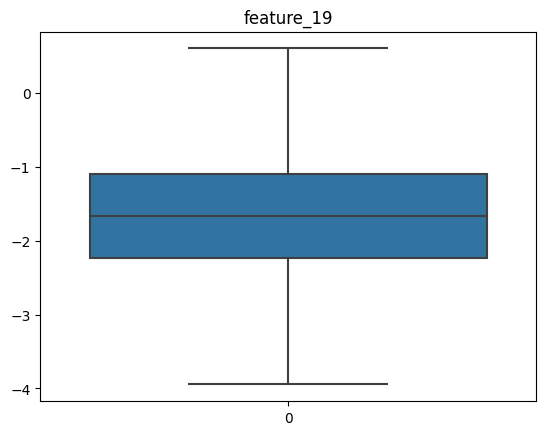

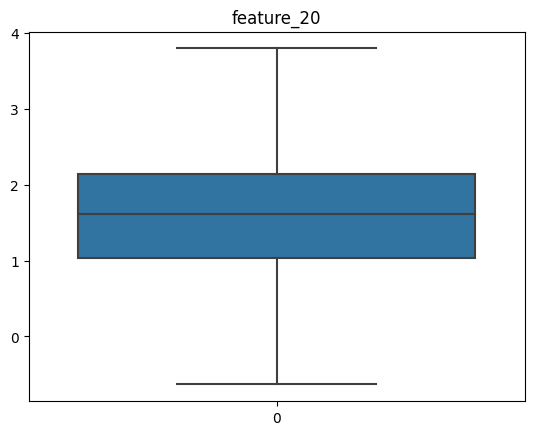

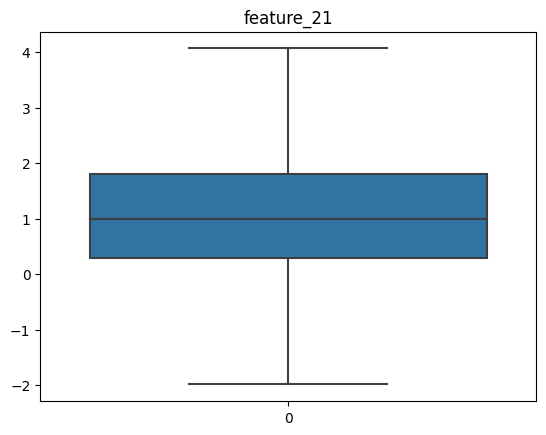

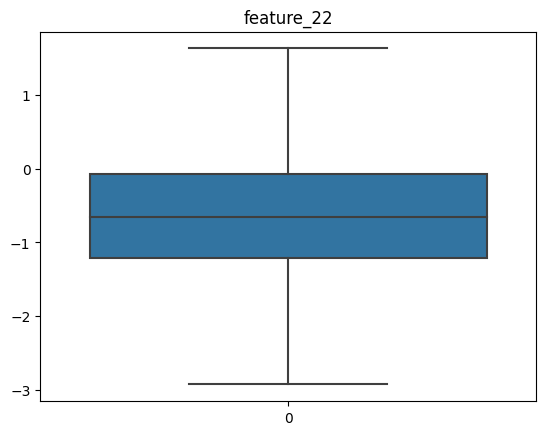

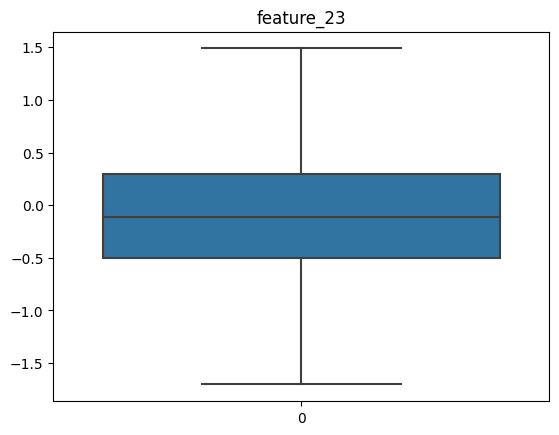

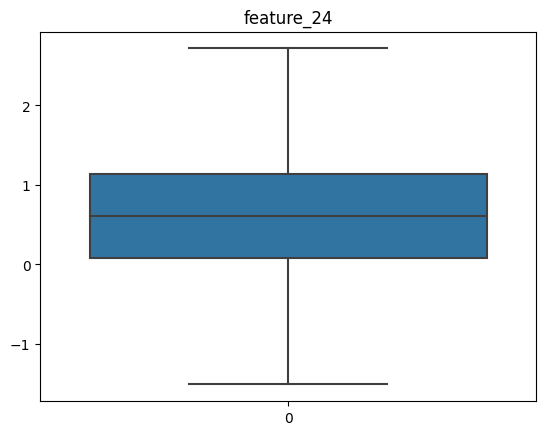

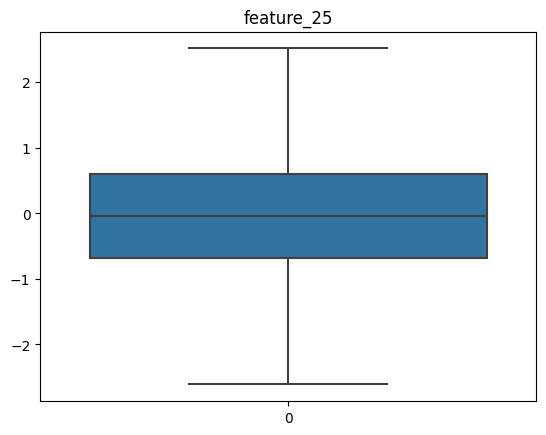

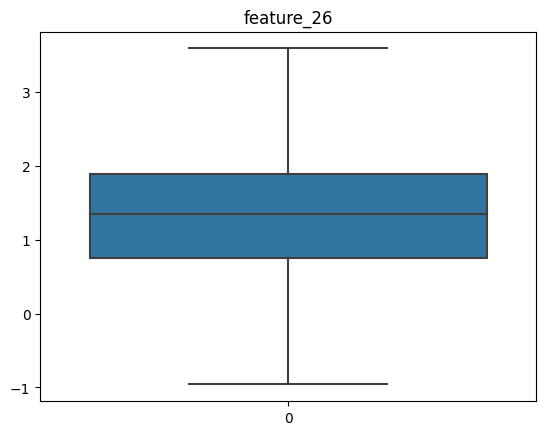

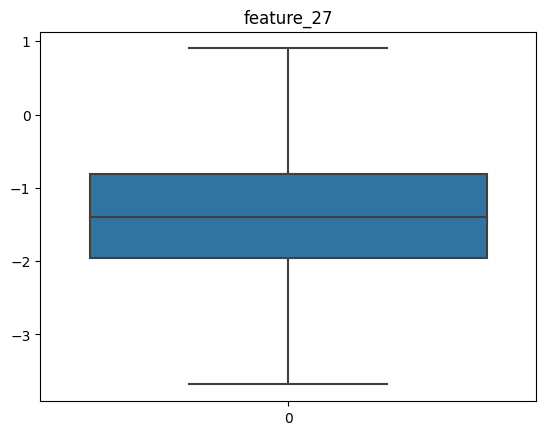

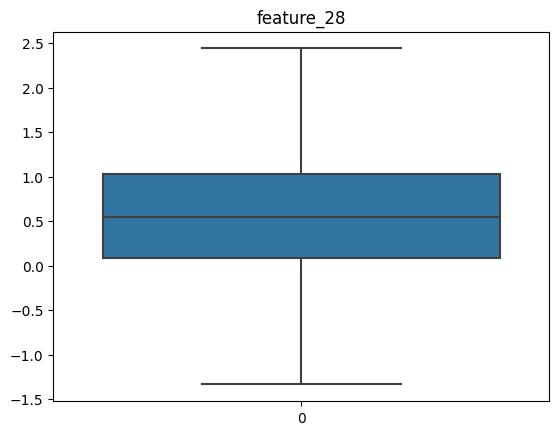

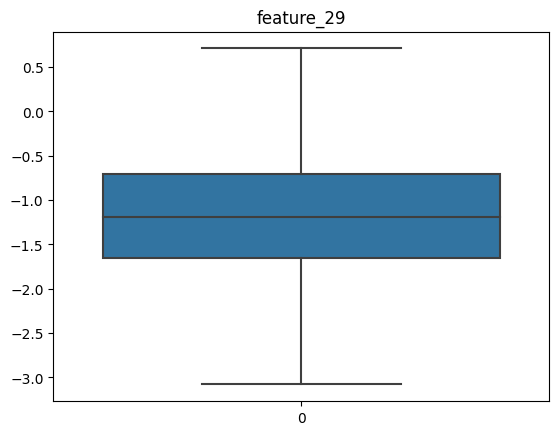

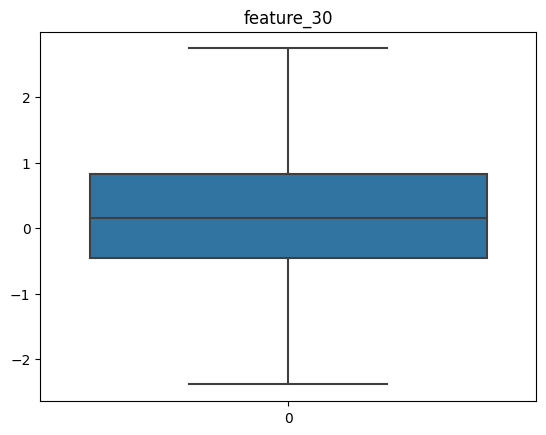

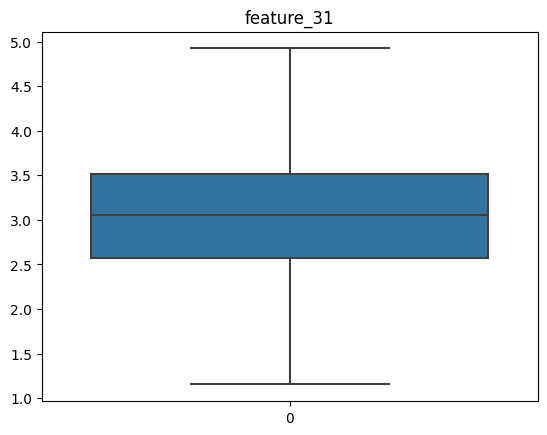

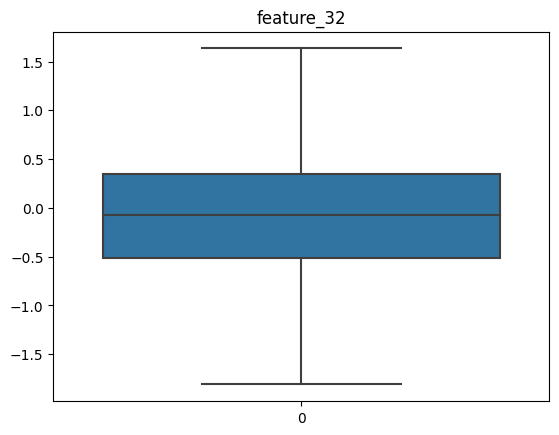

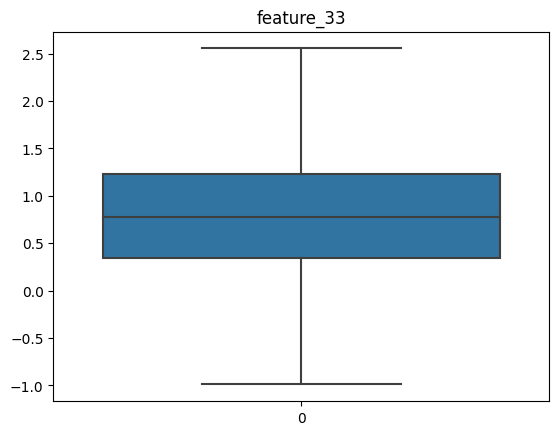

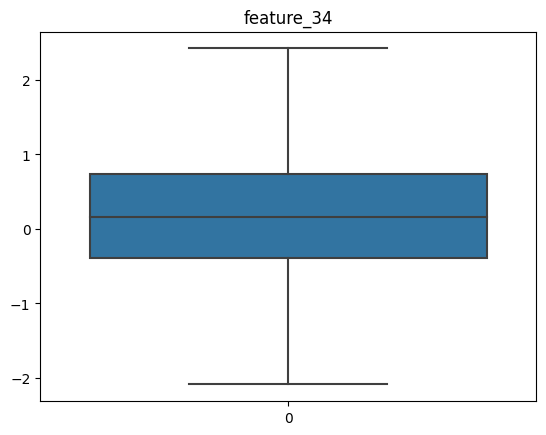

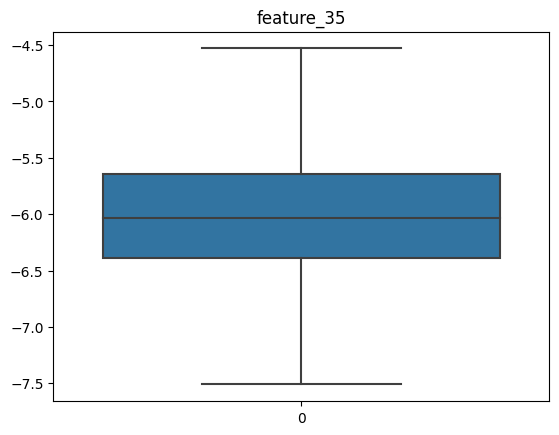

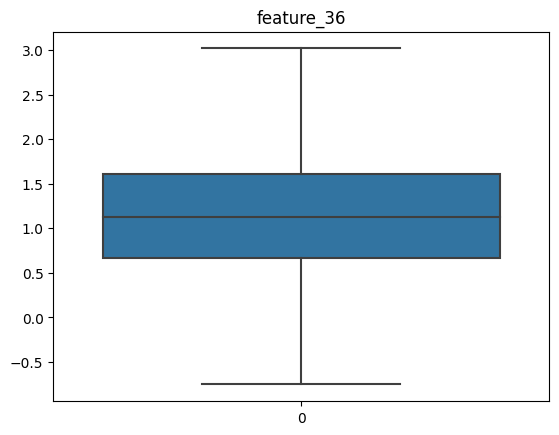

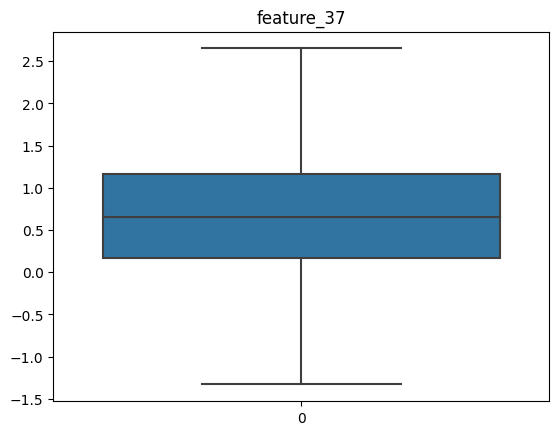

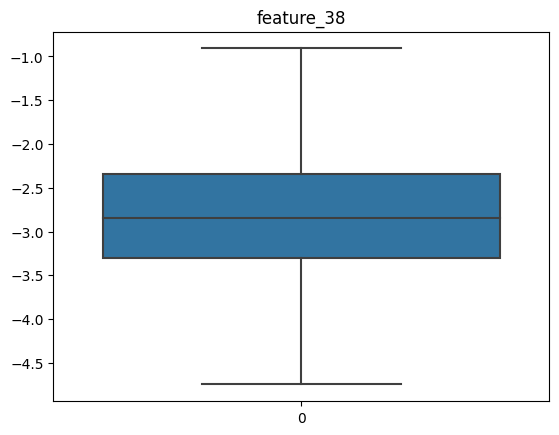

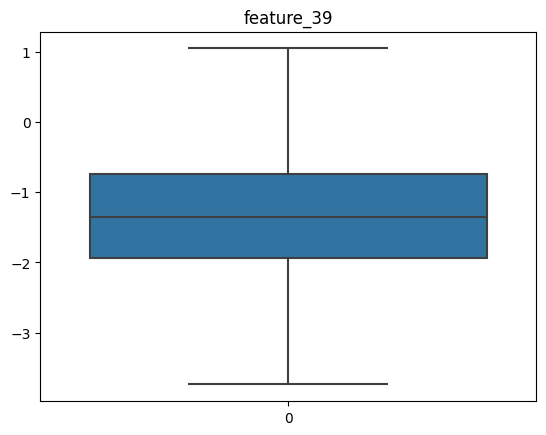

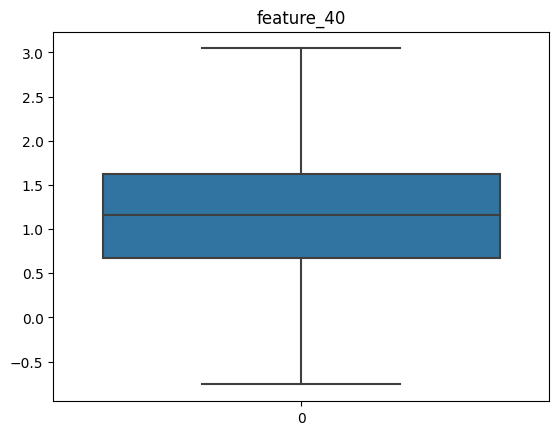

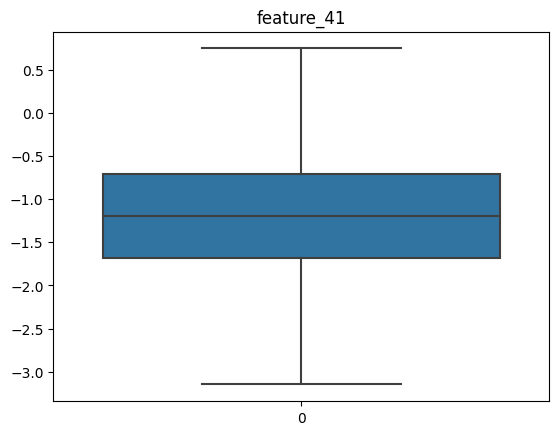

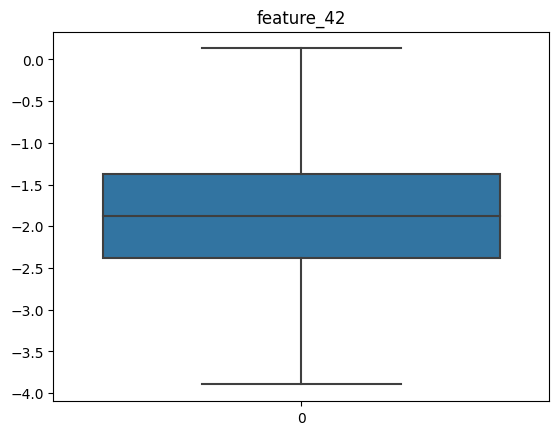

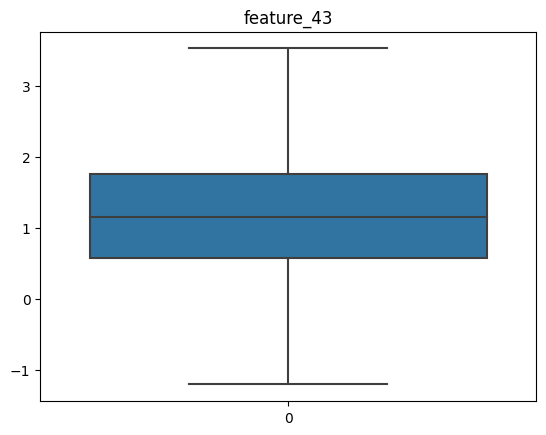

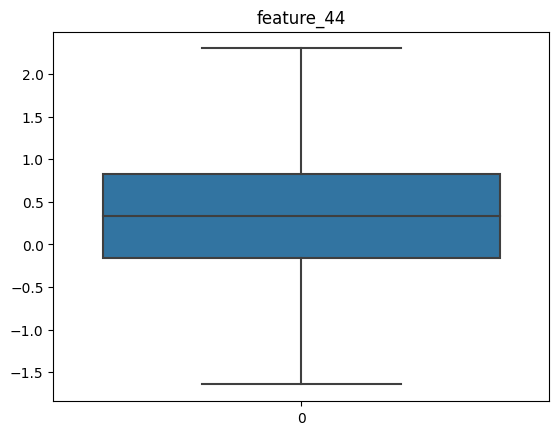

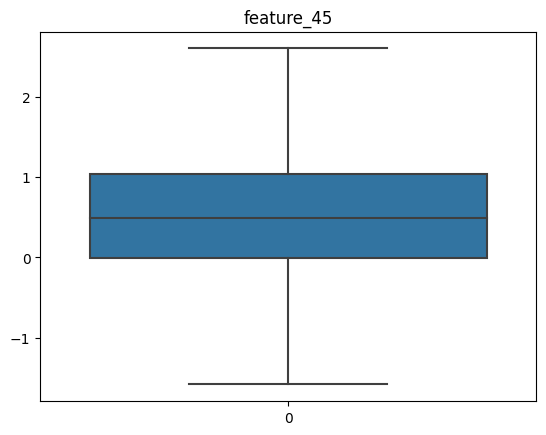

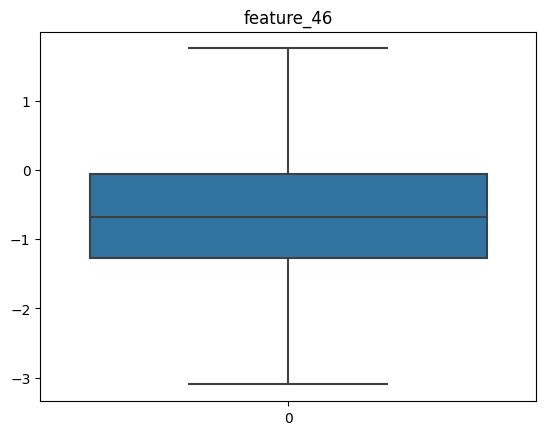

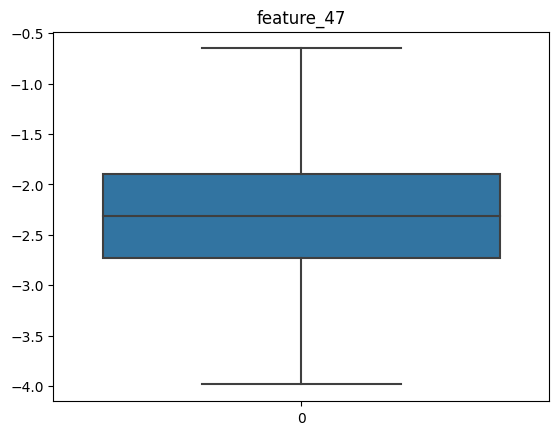

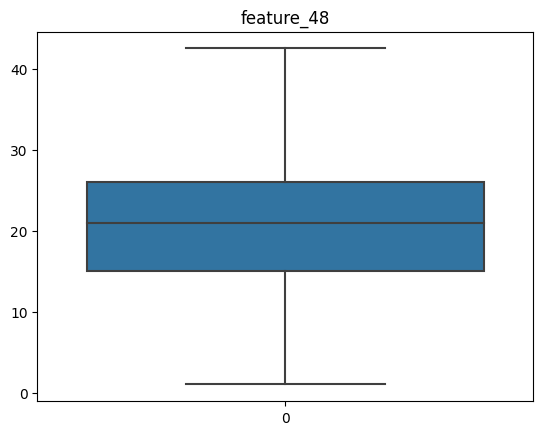

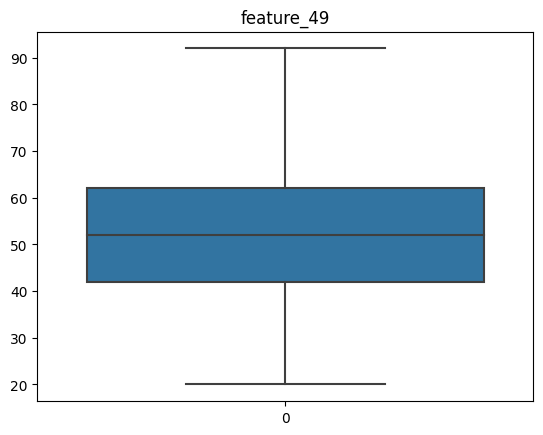

In [ ]:
df_test_say = df_test.select_dtypes(include = ["float64","int64"])

# Aykırı gözlemleri baskılamak için fonksiyon tanımladık.
def aykiri_gozlem_baskila(degisken):

    Q1 = degisken.quantile(0.25)
    Q3 = degisken.quantile(0.75)

    IQR = Q3-Q1

    low_limit = Q1 - 1.5*IQR
    up_limit = Q3 + 1.5*IQR

    degisken_low_limit = (degisken < low_limit)
    degisken_up_limit = (degisken > up_limit)

    degisken[degisken_up_limit] = up_limit
    degisken[degisken_low_limit] = low_limit



# Aykırı gözlemleri baskıladık.

for i in df_test_say.columns:
    aykiri_gozlem_baskila(df_test[i])


# Tüm sayısal değişkenler için aykırı gözlemlerin ortadan kaldırıldığını boxplot yardımıyla gözlemliyoruz.

for column in df_test_say.columns:
  plt.title(column)
  sns.boxplot(df_test[column])
  plt.show(block = True)

In [ ]:
df_test.head()

In [ ]:
df_test.info()

## 10 - Test Veri Seti Değişken Dönüşümleri

In [ ]:
df_test

In [ ]:
haric_tut = [1,2,3,4,5,6,15,16,18,27,28,33,41,51,55,56]
df_test.columns[haric_tut]

a = df_test.columns[haric_tut]
for i in df_test.columns:
    if i in a:
        continue
    else:
        df_test.drop(i, axis=1, inplace=True)
df_test

,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_8,feature_9,feature_11,feature_20,feature_21,feature_26,feature_34,feature_44,feature_48,feature_49
0,Ocak,883.76375,246.854,189.71725,VODAFONE TR,samsung,3.085004,-4.219648,2.453305,0.246188,2.257871,1.871465,2.422886,-1.643937,18.0,58
1,Ocak,883.76375,389.316,189.71725,TURKCELL,Apple,0.705718,-3.248426,-0.761663,2.684586,0.857986,0.356150,-1.020164,1.284697,3.0,35
2,Ocak,883.76375,389.316,189.71725,TURKCELL,samsung,1.275551,-4.784873,0.928116,0.728772,2.415584,0.148732,0.686554,0.055355,7.0,50
3,Ocak,883.76375,181.397,155.42300,TURK TELEKOM,Apple,-0.354368,-2.958280,-1.326045,1.964668,0.470133,1.095291,-0.861583,0.911519,22.0,47
4,Ocak,883.76375,126.133,100.06000,TURKCELL,POCO,0.468840,-4.917929,-1.475862,1.448957,1.125873,0.880568,0.845600,1.375090,29.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,Ocak,47.72600,40.879,40.64700,TURKCELL,HUAWEI,0.135411,-3.219415,-0.429162,1.908219,1.023640,0.757923,-0.729305,0.403641,18.0,45
11951,Ocak,47.47100,44.745,41.04000,TURKCELL,Apple,0.412109,-3.319977,-2.268671,2.422223,0.044998,2.556059,-0.068936,0.879146,20.0,44
11952,Ocak,47.40300,45.832,43.93200,TURK TELEKOM,Redmi,1.536046,-3.418124,-1.239201,2.124168,0.876603,2.052217,0.050617,0.351689,17.0,34
11953,Ocak,46.04400,43.592,40.73500,TURK TELEKOM,samsung,1.509733,-3.916099,-1.335883,2.365785,0.300854,0.874567,-1.304201,0.436466,26.0,58


In [ ]:
df_test.columns = ['month','n_seconds_11','n_seconds_22','n_seconds_33', 'carrier1', 'devicebrand2', 'feature_88','feature_99','feature_111','feature_200','feature_211','feature_266','feature_344','feature_444','feature_488','feature_499']
df_test.head()

,month,n_seconds_11,n_seconds_22,n_seconds_33,carrier1,devicebrand2,feature_88,feature_99,feature_111,feature_200,feature_211,feature_266,feature_344,feature_444,feature_488,feature_499
0,Ocak,883.76375,246.854,189.71725,VODAFONE TR,samsung,3.085004,-4.219648,2.453305,0.246188,2.257871,1.871465,2.422886,-1.643937,18.0,58
1,Ocak,883.76375,389.316,189.71725,TURKCELL,Apple,0.705718,-3.248426,-0.761663,2.684586,0.857986,0.356150,-1.020164,1.284697,3.0,35
2,Ocak,883.76375,389.316,189.71725,TURKCELL,samsung,1.275551,-4.784873,0.928116,0.728772,2.415584,0.148732,0.686554,0.055355,7.0,50
3,Ocak,883.76375,181.397,155.42300,TURK TELEKOM,Apple,-0.354368,-2.958280,-1.326045,1.964668,0.470133,1.095291,-0.861583,0.911519,22.0,47
4,Ocak,883.76375,126.133,100.06000,TURKCELL,POCO,0.468840,-4.917929,-1.475862,1.448957,1.125873,0.880568,0.845600,1.375090,29.0,52


In [ ]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

lbe.fit_transform(df_test["month"])

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_test["Ocak"] = lbe.fit_transform(df_test["month"])
df_test = df_test.drop("month", axis = 1)
df_test.head()

,n_seconds_11,n_seconds_22,n_seconds_33,carrier1,devicebrand2,feature_88,feature_99,feature_111,feature_200,feature_211,feature_266,feature_344,feature_444,feature_488,feature_499,Ocak
0,883.76375,246.854,189.71725,VODAFONE TR,samsung,3.085004,-4.219648,2.453305,0.246188,2.257871,1.871465,2.422886,-1.643937,18.0,58,0
1,883.76375,389.316,189.71725,TURKCELL,Apple,0.705718,-3.248426,-0.761663,2.684586,0.857986,0.356150,-1.020164,1.284697,3.0,35,0
2,883.76375,389.316,189.71725,TURKCELL,samsung,1.275551,-4.784873,0.928116,0.728772,2.415584,0.148732,0.686554,0.055355,7.0,50,0
3,883.76375,181.397,155.42300,TURK TELEKOM,Apple,-0.354368,-2.958280,-1.326045,1.964668,0.470133,1.095291,-0.861583,0.911519,22.0,47,0
4,883.76375,126.133,100.06000,TURKCELL,POCO,0.468840,-4.917929,-1.475862,1.448957,1.125873,0.880568,0.845600,1.375090,29.0,52,0


In [ ]:
# one-hot-encoder

df_test_cihaz = pd.get_dummies(df_test['devicebrand2'], drop_first = True).add_prefix('device1').astype(int)
df_test = pd.concat([df_test, df_test_cihaz], axis = 1)
df_test = df_test.drop(["devicebrand2"], axis = 1)
df_test.head()

,n_seconds_11,n_seconds_22,n_seconds_33,carrier1,feature_88,feature_99,feature_111,feature_200,feature_211,feature_266,...,device1google,device1htc,device1lge,device1motorola,device1nubia,device1realme,device1reeder,device1samsung,device1vivo,device1xiaomi
0,883.76375,246.854,189.71725,VODAFONE TR,3.085004,-4.219648,2.453305,0.246188,2.257871,1.871465,...,0,0,0,0,0,0,0,1,0,0
1,883.76375,389.316,189.71725,TURKCELL,0.705718,-3.248426,-0.761663,2.684586,0.857986,0.356150,...,0,0,0,0,0,0,0,0,0,0
2,883.76375,389.316,189.71725,TURKCELL,1.275551,-4.784873,0.928116,0.728772,2.415584,0.148732,...,0,0,0,0,0,0,0,1,0,0
3,883.76375,181.397,155.42300,TURK TELEKOM,-0.354368,-2.958280,-1.326045,1.964668,0.470133,1.095291,...,0,0,0,0,0,0,0,0,0,0
4,883.76375,126.133,100.06000,TURKCELL,0.468840,-4.917929,-1.475862,1.448957,1.125873,0.880568,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_hat = pd.get_dummies(df_test['carrier1'], drop_first = True).add_prefix('carrier11').astype(int)
df_test = pd.concat([df_test, df_test_hat], axis = 1)
df_test = df_test.drop(['carrier1'], axis = 1)
df_test.head()

,n_seconds_11,n_seconds_22,n_seconds_33,feature_88,feature_99,feature_111,feature_200,feature_211,feature_266,feature_344,...,carrier11WINDTRE,carrier11WINSIM,carrier11YASIN,carrier11YETTEL,carrier11YOTA,carrier11ZAIN,carrier11ZAIN IQ,carrier11ワイモバイル,carrier11中国移动,carrier11中国联通
0,883.76375,246.854,189.71725,3.085004,-4.219648,2.453305,0.246188,2.257871,1.871465,2.422886,...,0,0,0,0,0,0,0,0,0,0
1,883.76375,389.316,189.71725,0.705718,-3.248426,-0.761663,2.684586,0.857986,0.356150,-1.020164,...,0,0,0,0,0,0,0,0,0,0
2,883.76375,389.316,189.71725,1.275551,-4.784873,0.928116,0.728772,2.415584,0.148732,0.686554,...,0,0,0,0,0,0,0,0,0,0
3,883.76375,181.397,155.42300,-0.354368,-2.958280,-1.326045,1.964668,0.470133,1.095291,-0.861583,...,0,0,0,0,0,0,0,0,0,0
4,883.76375,126.133,100.06000,0.468840,-4.917929,-1.475862,1.448957,1.125873,0.880568,0.845600,...,0,0,0,0,0,0,0,0,0,0


**RobustScaler**

In [ ]:
scaler = RobustScaler()
df_test_scaled = scaler.fit_transform(df_test)

df_test_scaled = pd.DataFrame(df_test_scaled, columns = df_test.columns)
df_test_scaled.head()

,n_seconds_1,n_seconds_2,n_seconds_3,feature_8,feature_9,feature_11,feature_20,feature_21,feature_26,feature_34,...,carrier_WINDTRE,carrier_WINSIM,carrier_YASIN,carrier_YETTEL,carrier_YOTA,carrier_ZAIN,carrier_ZAIN IQ,carrier_ワイモバイル,carrier_中国移动,carrier_中国联通
0,2.134559,0.981728,2.155855,2.025085,-0.436312,2.033587,-1.230268,0.839496,0.455072,2.009172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.134559,2.152712,2.155855,-0.282114,0.371436,-0.093494,0.972184,-0.085552,-0.876305,-1.044440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.134559,2.152712,2.155855,0.270454,-0.906401,1.024495,-0.794380,0.943713,-1.058545,0.469233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.134559,0.443696,1.536171,-1.310081,0.612746,-0.466899,0.321928,-0.341846,-0.226886,-0.903796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.134559,-0.010554,0.535782,-0.511814,-1.017061,-0.566021,-0.143882,0.091469,-0.415544,0.610290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**StandartScaler**

In [ ]:
scaler = StandardScaler()
scaler.fit(df_test)

df_test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled, columns = df_test.columns)

df_test_scaled.head()

,n_seconds_11,n_seconds_22,n_seconds_33,feature_88,feature_99,feature_111,feature_200,feature_211,feature_266,feature_344,...,carrier11WINDTRE,carrier11WINSIM,carrier11YASIN,carrier11YETTEL,carrier11YOTA,carrier11ZAIN,carrier11ZAIN IQ,carrier11ワイモバイル,carrier11中国移动,carrier11中国联通
0,2.465115,0.915192,2.326871,2.587067,-0.538955,2.625421,-1.616144,1.076990,0.672998,2.667782,...,-0.009146,-0.009146,-0.009146,-0.012935,-0.009146,-0.015843,-0.015843,-0.009146,-0.009146,-0.009146
1,2.465115,2.393835,2.326871,-0.436071,0.566851,-0.202418,1.390248,-0.188753,-1.048500,-1.424502,...,-0.009146,-0.009146,-0.009146,-0.012935,-0.009146,-0.015843,-0.015843,-0.009146,-0.009146,-0.009146
2,2.465115,2.393835,2.326871,0.287963,-1.182505,1.283887,-1.021149,1.219590,-1.284140,0.604040,...,-0.009146,-0.009146,-0.009146,-0.012935,-0.009146,-0.015843,-0.015843,-0.009146,-0.009146,-0.009146
3,2.465115,0.235801,1.555939,-1.783024,0.897203,-0.698841,0.502634,-0.539441,-0.208787,-1.236019,...,-0.009146,-0.009146,-0.009146,-0.012935,-0.009146,-0.015843,-0.015843,-0.009146,-0.009146,-0.009146
4,2.465115,-0.337796,0.311384,-0.737050,-1.333999,-0.830618,-0.133205,0.053464,-0.452726,0.793076,...,-0.009146,-0.009146,-0.009146,-0.012935,-0.009146,-0.015843,-0.015843,-0.009146,-0.009146,-0.009146


## 11 - Veriyi Ayırma İşlemleri

In [ ]:
# Bağımsız Değişkenler
X = pd.concat([df_test_scaled, df_scaled.drop(['menu1','menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'], axis=1)], axis=1)

# Bağımlı Değişkenler
Y = df_scaled.get(['menu1','menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])

# NaN değerlerini sütun bazında ortalamalarla doldurun
X = X.fillna(X.mean())

In [ ]:
X

In [ ]:
istenen_sutun = X['Kasım']
istenen_sutun

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  # 20% of date=testing

## 12 - Model Kurma

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Modeli oluşturun
model = MultiOutputClassifier(LogisticRegression())

# Modeli eğitin
model.fit(X_train, y_train)

# Tahminler yapın
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score


predictions = model.predict(X_test)

# Her bir hedef değişken için ayrı ayrı doğruluk skoru hesaplama
for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], predictions[:, i])
    print(f"Accuracy for output {i}: {accuracy}")

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)   #Modelin RMSE değeri
print("RMSE (ilkel):",rmse)

In [ ]:
from sklearn.metrics import jaccard_score

# Tahminler
predictions = model.predict(X_test)
sum = 0
# Her bir hedef değişken için ayrı ayrı Jaccard skoru hesaplama
for i in range(prediction.shape[1]):
    score = jaccard_score(y_test.iloc[:, i], predictions[:, i], average='macro')
    print(f"Jaccard Score for output {i}: {score}")
    sum += score
print(sum / 9)

In [ ]:
# Tahminleri dizeye dönüştürme
y_pred_str = [''.join(str(int(x)) for x in pred) for pred in y_pred]

# Her bir tahminin yalnızca 3 adet menüyü içermesi gerektiği belirtilmiş.
# Bu nedenle, her bir tahminde en yüksek 3 olasılığa sahip menülerin indekslerini bulmalıyız.
# Ardından, bu indekslere karşılık gelen yerleri '1' olarak ayarlayıp diğerlerini '0' olarak ayarlamalıyız.

# Tahminlerinizi numpy dizisine dönüştürüyoruz
predictions_np = np.array(y_pred)

# Her bir tahmin için en yüksek 3 olasılığa sahip indeksleri bulduk
top3_idx = np.argpartition(predictions_np, -3, axis=1)[:, -3:]

# Yeni tahminler dizisini oluşturun ve tüm değerleri '0' olarak ayarladık
new_predictions = np.zeros_like(predictions_np)

# En yüksek 3 olasılığa sahip indekslere karşılık gelen yerleri '1' olarak ayarladık
for i in range(new_predictions.shape[0]):
    new_predictions[i, top3_idx[i]] = 1

# Yeni tahminleri dizeye dönüştürme
y_pred_str = [''.join(str(int(x)) for x in new_pred) for new_pred in new_predictions]

In [ ]:
new_predictions_str

In [ ]:
# Tahminleri sınırlama
new_predictions_str = y_pred_str[:len(test_ids)]

# Kontrol etme
print(len(new_predictions_str))
print(len(test_ids))

In [ ]:
# Tahminleri ve 'id'lerini bir pandas DataFrame'ine dönüştürme
submission_df = pd.DataFrame({
    'id': test_ids,
    'target': new_predictions_str
})

# DataFrame'i bir CSV dosyasına yazdırma
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submit_dosya = pd.read_csv('submission.csv')
submit_dosya

In [ ]:
df_final = pd.read_parquet('/kaggle/input/turkiye-is-bankasi-ml-challenge-5/submission_sample_final.parquet')
df_final

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv')

---------

### KNN

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                   random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
?knn_model

**KNN Tahmin**

In [ ]:
y_pred = knn_model.predict(X_test)

import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE (ilkel):",rmse)

RMSE (ilkel): 0.43116560507180896


**KNN Model Tunning**

In [ ]:
import optuna

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 1, 10)
    p = trial.suggest_int('p', 1, 2)
    metric = trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan'])

    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p, metric=metric, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

best_params = study.best_params
print(f"Best parameters: {best_params}")


[I 2023-10-06 16:44:59,274] A new study created in memory with name: no-name-0eebf230-8a9e-404a-862c-027f77c5fa8f
[I 2023-10-06 17:42:52,414] Trial 0 finished with value: 0.4105021877138088 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 4, 'p': 2, 'metric': 'manhattan'}. Best is trial 0 with value: 0.4105021877138088.
[I 2023-10-06 17:43:41,109] Trial 1 finished with value: 0.40373824628747795 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 9, 'p': 2, 'metric': 'minkowski'}. Best is trial 1 with value: 0.40373824628747795.
[I 2023-10-06 17:58:23,423] Trial 2 finished with value: 0.40912111734940776 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 3, 'p': 2, 'metric': 'minkowski'}. Best is trial 1 with value: 0.40373824628747795.
[I 2023-10-06 17:59:12,205] Trial 3 finished with value: 0.40912111734940776 and parameters: {'n_neighbors': 12, 'weigh

Best parameters: {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 9, 'p': 2, 'metric': 'minkowski'}


In [ ]:
# Final model
knn_model_optimized = KNeighborsRegressor(**best_params).fit(X_train, y_train)

y_pred_optimized = knn_model_optimized.predict(X_test)

rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
print("Optimized RMSE:", rmse_optimized)

Optimized RMSE: 0.40373824628747795


In [ ]:
# Tahminleri dizeye dönüştürme
y_pred_str = [''.join(str(int(x)) for x in pred) for pred in y_pred_optimized]

# Her bir tahminin yalnızca 3 adet menüyü içermesi gerektiği belirtilmiş.
# Bu nedenle, her bir tahminde en yüksek 3 olasılığa sahip menülerin indekslerini bulmalıyız.
# Ardından, bu indekslere karşılık gelen yerleri '1' olarak ayarlayıp diğerlerini '0' olarak ayarlamalıyız.

# Tahminlerinizi numpy dizisine dönüştürüyoruz
predictions_np = np.array(y_pred_optimized)

# Her bir tahmin için en yüksek 3 olasılığa sahip indeksleri bulduk
top3_idx = np.argpartition(predictions_np, -3, axis=1)[:, -3:]

# Yeni tahminler dizisini oluşturun ve tüm değerleri '0' olarak ayarladık
new_predictions = np.zeros_like(predictions_np)

# En yüksek 3 olasılığa sahip indekslere karşılık gelen yerleri '1' olarak ayarladık
for i in range(new_predictions.shape[0]):
    new_predictions[i, top3_idx[i]] = 1

# Yeni tahminleri dizeye dönüştürme
y_pred_str = [''.join(str(int(x)) for x in new_pred) for new_pred in new_predictions]

In [ ]:
# Tahminleri sınırlama
new_predictions_str = y_pred_str[:len(test_ids)]

# Kontrol etme
print(len(new_predictions_str))
print(len(test_ids))

11955
11955


In [ ]:
# Tahminleri ve 'id'lerini bir pandas DataFrame'ine dönüştürme
submission_df = pd.DataFrame({
    'id': test_ids,
    'target': new_predictions_str
})

# DataFrame'i bir CSV dosyasına yazdırma
submission_df.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

-----

### LightGBM

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                   random_state = 42)

In [ ]:
import re

def clean_feature_name(name):
  """Removes special JSON characters from a feature name."""
  return re.sub(r"[^\w\d\s]", "_", name)

# Clean the feature names in the training data
X_train = X_train.rename(columns=clean_feature_name)
y_train = y_train.rename(columns=clean_feature_name)
X_test = X_test.rename(columns=clean_feature_name)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

# Create a multi-output regressor
multioutput_regressor = MultiOutputRegressor(LGBMRegressor())

# Fit the model to the data
multioutput_regressor.fit(X_train, y_train)

# Make predictions
y_pred = multioutput_regressor.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE (ilkel test):", rmse)

ValueError: Found array with 1 sample(s) (shape=(1, 854)) while a minimum of 2 is required.

In [ ]:
df_scaled = df_scaled.loc[:, ~df_scaled.columns.duplicated(keep='first')]
df_test_scaled = df_test_scaled.loc[:, ~df_test_scaled.columns.duplicated(keep='first')]

### Bagged Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [ ]:
# Tahminler
y_pred = bag_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   #Modelin RMSE değeri

print("RMSE (ilkel):",rmse)

RMSE (ilkel): 1.0325316943964076


In [ ]:
# Tahminleri dizeye dönüştürme
y_pred_str = [''.join(str(int(x)) for x in pred) for pred in y_pred]

# Her bir tahminin yalnızca 3 adet menüyü içermesi gerektiği belirtilmiş.
# Bu nedenle, her bir tahminde en yüksek 3 olasılığa sahip menülerin indekslerini bulmalıyız.
# Ardından, bu indekslere karşılık gelen yerleri '1' olarak ayarlayıp diğerlerini '0' olarak ayarlamalıyız.

# Tahminlerinizi numpy dizisine dönüştürüyoruz
predictions_np = np.array(y_pred)

# Her bir tahmin için en yüksek 3 olasılığa sahip indeksleri bulduk
top3_idx = np.argpartition(predictions_np, -3, axis=1)[:, -3:]

# Yeni tahminler dizisini oluşturun ve tüm değerleri '0' olarak ayarladık
new_predictions = np.zeros_like(predictions_np)

# En yüksek 3 olasılığa sahip indekslere karşılık gelen yerleri '1' olarak ayarladık
for i in range(new_predictions.shape[0]):
    new_predictions[i, top3_idx[i]] = 1

# Yeni tahminleri dizeye dönüştürme
y_pred_str = [''.join(str(int(x)) for x in new_pred) for new_pred in new_predictions]

In [ ]:
# Tahminleri sınırlama
new_predictions_str = y_pred_str[:len(test_ids)]

# Kontrol etme
print(len(new_predictions_str))
print(len(test_ids))

11955
11955


In [ ]:
# Tahminleri ve 'id'lerini bir pandas DataFrame'ine dönüştürme
submission_df = pd.DataFrame({
    'id': test_ids,
    'target': new_predictions_str
})

# DataFrame'i bir CSV dosyasına yazdırma
submission_df.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv

In [ ]:
from sklearn.model_selection import GridSearchCV

bag_params = {"n_estimators": range(2,20)}
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 3)
bag_cv_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
bag_cv_model.best_params_

In [ ]:
# Bağımsız Değişkenler
X = pd.concat([df_test_scaled, df_scaled.drop(['menu1','menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'], axis=1)], axis=1)

# Bağımlı Değişkenler
y = df_scaled.get(['menu1','menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9'])

# NaN değerlerini sütun bazında ortalamalarla doldurun
X = X.fillna(X.mean())


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    #test_size=0.25,
                                                    #random_state=42)
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train_reduced, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_model.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE (ilkel test):",rmse)

RMSE (ilkel test): 1.0325316943964076


In [ ]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

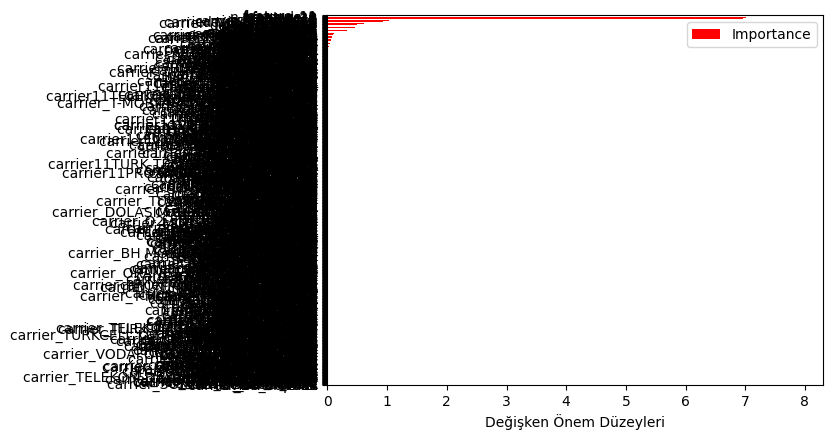

In [ ]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
top_5_features = Importance.nlargest(13, 'Importance')
print(top_5_features)

                  Importance
feature_11          7.915642
feature_9           7.572485
feature_21          7.560982
n_seconds_1         7.217442
feature_34          7.043085
feature_8           7.018465
feature_20          6.996345
feature_44          6.958134
n_seconds_2         6.395152
n_seconds_3         6.339941
feature_49          5.795872
feature_48          5.362378
carrier_TURKCELL    1.036774


In [ ]:
# En çok etki eden 5 özelliğin adlarını bir listeye al
top_5_features_list = top_5_features.index.tolist()

# Bu özellikler dışındaki tüm özellikleri at
X_train_reduced = X_train.drop([col for col in X_train.columns if col not in top_5_features_list], axis=1)